In [1]:
import pandas as pd

In [2]:
import io
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded["exoplanet_data.csv"]))

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()

df.head()

Saving exoplanet_data.csv to exoplanet_data.csv


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [4]:
df.corr()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
koi_fpflag_nt,1.000000,-0.241148,0.003062,0.050790,0.408724,0.353231,-0.353231,0.249381,0.250697,-0.250697,0.072748,-0.012333,-0.059048,0.287118,0.337558,-0.337558,-0.043942,0.031922,-0.031922,0.054410,0.061662,-0.051273,-0.003013,-0.000566,0.017538,-0.002140,-0.079241,0.035902,0.105008,0.129444,-0.149565,-0.128576,0.053214,-0.140248,0.045535,0.098100,-0.062283,0.030920,-0.046510,-0.101643
koi_fpflag_ss,-0.241148,1.000000,0.144516,0.101695,-0.155964,-0.134208,0.134208,-0.111469,-0.177043,0.177043,0.042021,0.130379,0.054633,0.014224,-0.181716,0.181716,0.423883,0.003900,-0.003900,-0.000752,0.004241,0.003393,0.191842,0.031315,0.030962,-0.023719,0.439764,-0.184721,0.104600,0.222332,-0.185036,-0.053394,0.118900,-0.061800,0.032638,0.030783,-0.034283,0.088010,-0.053471,-0.006009
koi_fpflag_co,0.003062,0.144516,1.000000,0.538280,-0.164792,-0.084351,0.084351,-0.121452,-0.023107,0.023107,0.007501,0.097642,0.002609,-0.048398,-0.004961,0.004961,-0.132939,-0.011108,0.011108,-0.013284,-0.015563,0.012901,0.259045,0.018086,0.016958,-0.011543,-0.134479,-0.122911,0.016750,0.159761,-0.121247,-0.012101,-0.019921,-0.057406,0.032129,0.029239,-0.016611,0.159988,-0.094027,0.067023
koi_fpflag_ec,0.050790,0.101695,0.538280,1.000000,-0.138946,-0.079903,0.079903,-0.099760,0.013635,-0.013635,-0.004913,0.030568,0.011326,0.023232,0.025359,-0.025359,-0.088001,-0.003062,0.003062,-0.011078,-0.013318,0.009913,0.218624,0.034874,0.045647,-0.028259,-0.091905,-0.103976,0.012411,0.120078,-0.083607,0.003066,-0.006111,-0.052307,0.022411,0.030085,-0.011970,0.069693,-0.045495,0.047932
koi_period,0.408724,-0.155964,-0.164792,-0.138946,1.000000,0.674842,-0.674842,0.655186,0.272529,-0.272529,0.067571,0.012136,-0.074607,0.324488,0.373670,-0.373670,-0.064272,0.038614,-0.038614,0.072790,0.052353,-0.070736,-0.390006,-0.021743,-0.029905,0.020268,-0.081456,-0.022590,0.021806,0.036838,-0.036036,-0.055410,-0.006147,-0.168086,0.017590,0.041289,-0.008776,-0.030675,0.011226,-0.045959
koi_period_err1,0.353231,-0.134208,-0.084351,-0.079903,0.674842,1.000000,-1.000000,0.469613,0.472034,-0.472034,0.028068,-0.004699,-0.039732,0.268469,0.529821,-0.529821,-0.069138,0.009823,-0.009823,0.030522,0.021726,-0.030554,-0.229438,-0.011772,-0.016157,0.010945,-0.082299,0.021398,0.032776,0.078357,-0.055134,-0.014447,0.005737,-0.140277,0.015100,0.033152,-0.008890,-0.005353,0.007145,-0.034097
koi_period_err2,-0.353231,0.134208,0.084351,0.079903,-0.674842,-1.000000,1.000000,-0.469613,-0.472034,0.472034,-0.028068,0.004699,0.039732,-0.268469,-0.529821,0.529821,0.069138,-0.009823,0.009823,-0.030522,-0.021726,0.030554,0.229438,0.011772,0.016157,-0.010945,0.082299,-0.021398,-0.032776,-0.078357,0.055134,0.014447,-0.005737,0.140277,-0.015100,-0.033152,0.008890,0.005353,-0.007145,0.034097
koi_time0bk,0.249381,-0.111469,-0.121452,-0.099760,0.655186,0.469613,-0.469613,1.000000,0.162845,-0.162845,0.055597,0.044399,-0.065649,0.200979,0.228485,-0.228485,-0.037195,0.055597,-0.055597,0.039814,0.041496,-0.037977,-0.315510,-0.021307,-0.028232,0.020156,-0.058522,-0.006344,0.003641,0.039981,-0.030101,-0.001929,-0.031890,-0.107467,-0.004831,0.006444,0.011434,-0.016981,0.010483,0.021898
koi_time0bk_err1,0.250697,-0.177043,-0.023107,0.013635,0.272529,0.472034,-0.472034,0.162845,1.000000,-1.000000,0.023150,-0.015680,-0.035277,0.199305,0.519143,-0.519143,-0.110431,0.015094,-0.015094,0.014575,0.031086,-0.013119,-0.106671,-0.003327,-0.005414,0.000172,-0.132032,0.069041,0.049934,0.063753,-0.056111,-0.046285,0.03

In [5]:
selected_features = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_prad']]

In [6]:
y = df.koi_disposition


In [7]:
y = y.values.reshape(-1, 1)
y = y.flatten()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=1)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_prad
3563,0,0,0,0,3.89
4099,0,0,0,0,2.10
5460,0,0,0,0,14.59
1091,0,0,0,0,2.28
5999,0,0,0,0,2.27


In [10]:
y_test

array(['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', ...,
       'FALSE POSITIVE', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [11]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)


X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=6000)
model1
model1.fit(X_train, y_train)

print(f"Training Data Score: {model1.score(X_train, y_train)}")
print(f"Testing Data Score: {model1.score(X_test, y_test)}")

Training Data Score: 0.7604424947549113
Testing Data Score: 0.7751716247139588


In [13]:
model1.fit(X_train, y_train)

LogisticRegression(max_iter=6000)

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'penalty': ["l2"]}
grid = GridSearchCV(model1, param_grid, verbose=3)

In [15]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................C=1, penalty=l2;, score=0.763 total time=   0.3s
[CV 2/5] END ...................C=1, penalty=l2;, score=0.760 total time=   0.4s
[CV 3/5] END ...................C=1, penalty=l2;, score=0.754 total time=   0.6s
[CV 4/5] END ...................C=1, penalty=l2;, score=0.756 total time=   0.5s
[CV 5/5] END ...................C=1, penalty=l2;, score=0.770 total time=   0.4s
[CV 1/5] END ...................C=5, penalty=l2;, score=0.762 total time=   0.5s
[CV 2/5] END ...................C=5, penalty=l2;, score=0.760 total time=   0.5s
[CV 3/5] END ...................C=5, penalty=l2;, score=0.754 total time=   0.4s
[CV 4/5] END ...................C=5, penalty=l2;, score=0.755 total time=   0.6s
[CV 5/5] END ...................C=5, penalty=l2;, score=0.769 total time=   0.6s
[CV 1/5] END ..................C=10, penalty=l2;, score=0.762 total time=   0.6s
[CV 2/5] END ..................C=10, penalty=l2;,

GridSearchCV(estimator=LogisticRegression(max_iter=6000),
             param_grid={'C': [1, 5, 10, 50], 'penalty': ['l2']}, verbose=3)

In [16]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 1, 'penalty': 'l2'}
0.7604434248539139


In [17]:
predictions = model1.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")


pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

First 10 Predictions:   ['CONFIRMED' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CONFIRMED'
 'CONFIRMED' 'FALSE POSITIVE']
First 10 Actual labels: ['CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'FALSE POSITIVE', 'FALSE POSITIVE', 'FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE']


,Prediction,Actual
0,CONFIRMED,CONFIRMED
1,FALSE POSITIVE,FALSE POSITIVE
2,FALSE POSITIVE,FALSE POSITIVE
3,CONFIRMED,CONFIRMED
4,FALSE POSITIVE,FALSE POSITIVE
...,...,...
1743,FALSE POSITIVE,FALSE POSITIVE
1744,CONFIRMED,CONFIRMED
1745,FALSE POSITIVE,FALSE POSITIVE
1746,FALSE POSITIVE,FALSE POSITIVE


Text(0.5, 15.0, 'Predicted label')

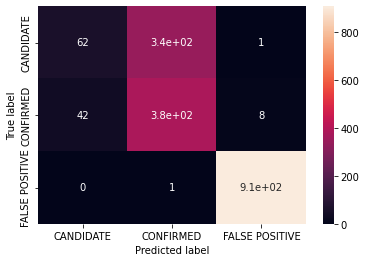

In [21]:
import seaborn as sb
import matplotlib.pyplot as plt
cm = pd.crosstab(y_test, predictions)
sb.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [25]:
from sklearn.metrics import confusion_matrix
tn = confusion_matrix(y_test,predictions).ravel()
fp= confusion_matrix(y_test,predictions).ravel()
fn = confusion_matrix(y_test,predictions).ravel()
tp = confusion_matrix(y_test,predictions).ravel()
print(tn, fp, fn , tp, '\n')
from sklearn.metrics import accuracy_score

print("Accuracy is ", accuracy_score(y_test, predictions))
#print("F1 score ", str((2*tp)/(2*tp+fp+fn)))
#print("Precision ",str(tp/(tp+fp)) )
#print("Specificity ", str(tn/(tn+fp)))
#print("Sensitivity ",str(tp/(tp+fn)) )

[ 62 341   1  42 385   8   0   1 908] [ 62 341   1  42 385   8   0   1 908] [ 62 341   1  42 385   8   0   1 908] [ 62 341   1  42 385   8   0   1 908] 

Accuracy is  0.7751716247139588
